# CROP Yield Prediction

In [1]:

#imports all basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('crop_yield.csv')   #to load dataset
df.head()   #to load first 5 records

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.shape   #to check number of rows and columns

(19689, 10)

In [4]:
df.isnull().sum()  #to check null values

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
#to check datatypes
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [6]:
#to check number of records of each value
df['Crop'].value_counts()

Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garlic    

In [7]:
df['Season'].value_counts()

Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: Season, dtype: int64

In [8]:
df['State'].value_counts()

Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Uttarakhand           764
Odisha                760
Assam                 731
Nagaland              689
Puducherry            670
Meghalaya             649
Haryana               631
Jammu and Kashmir     631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Telangana             397
Punjab                397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: State, dtype: int64

In [9]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


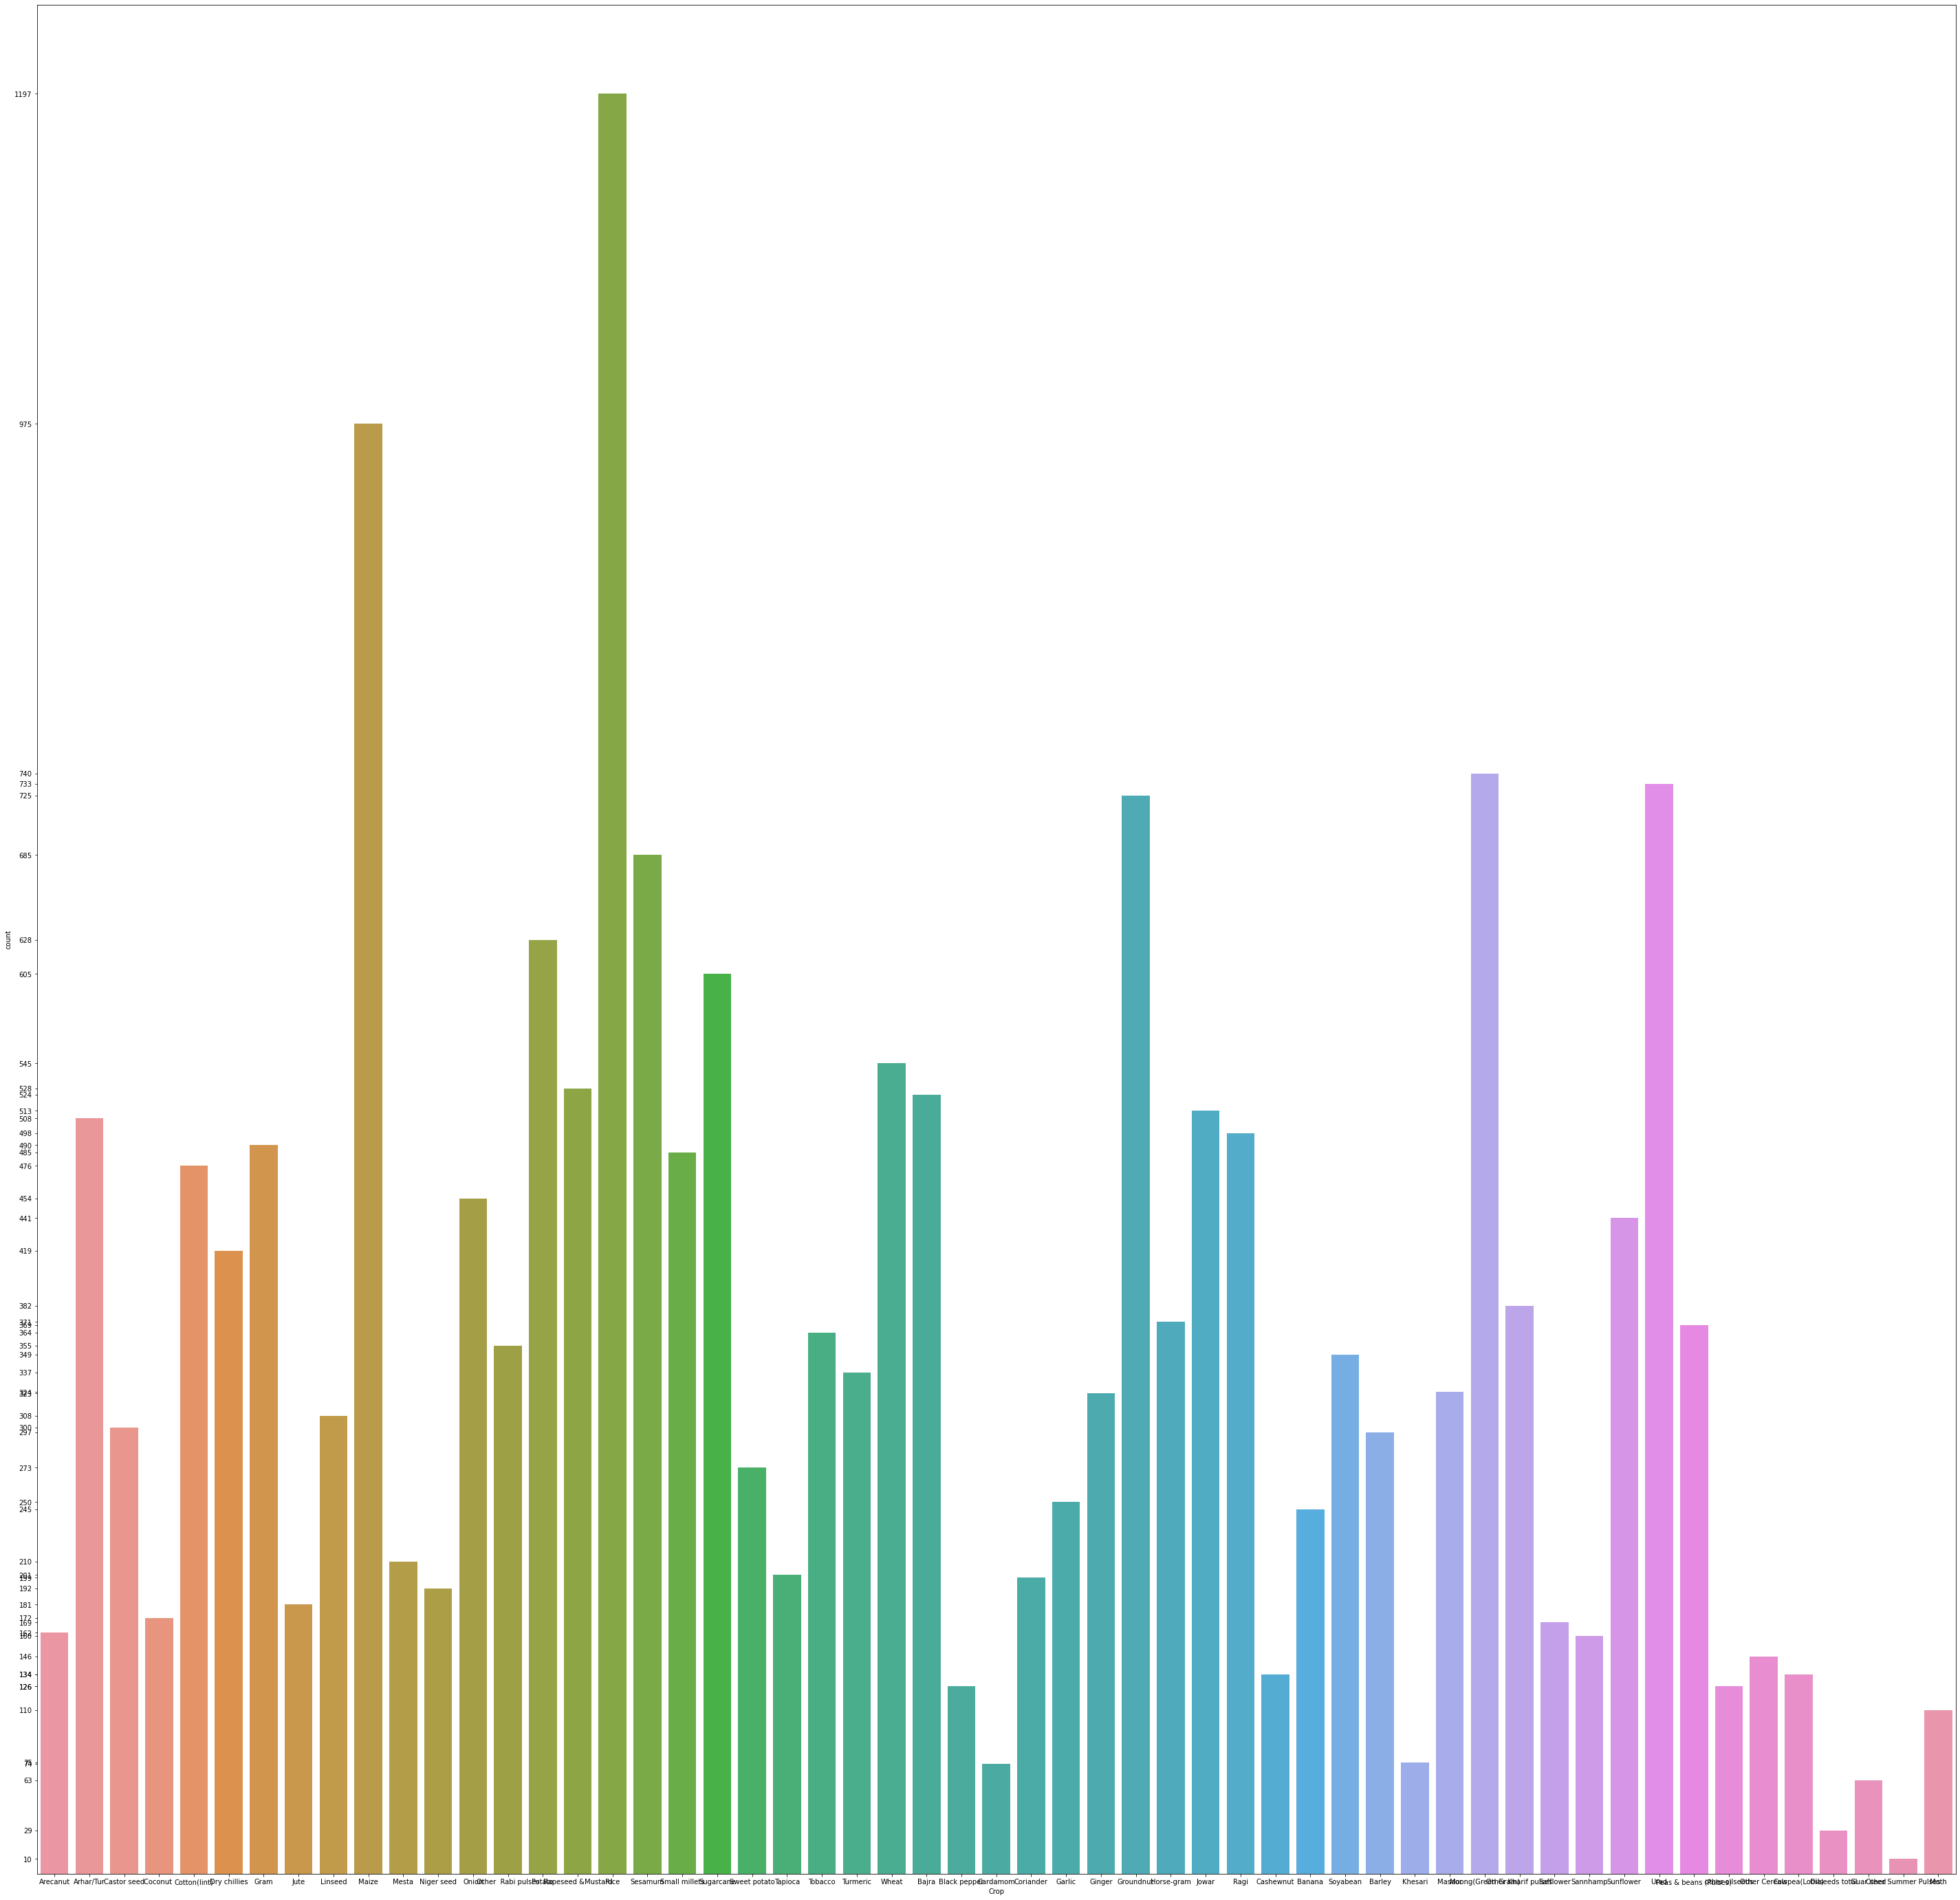

In [10]:
#To visualize
f=df['Crop'].value_counts()
plt.figure(figsize=(50,50))
sb.countplot(data=df,x='Crop')
plt.yticks(f)
plt.show()

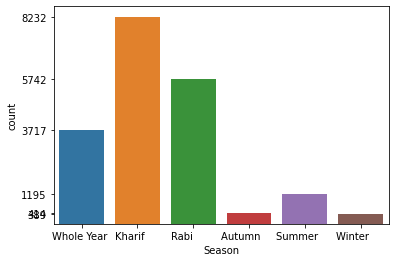

In [11]:
f=df['Season'].value_counts()
#plt.figure(figsize=(50,50))
sb.countplot(data=df,x='Season')
plt.yticks(f)
plt.show()

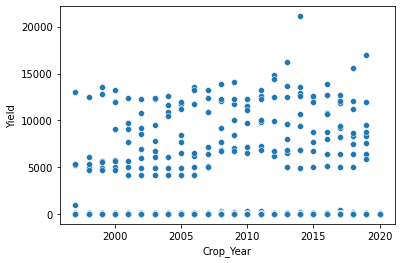

In [12]:
#To view relation between crop_year and yield
sb.scatterplot(data=df,x='Crop_Year',y='Yield')
plt.show()

In [13]:
df.duplicated().sum()   #To check duplicate values

0

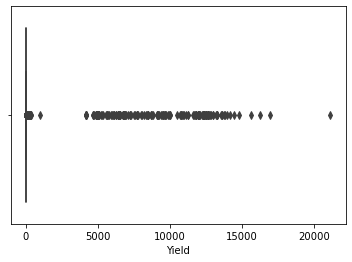

In [14]:
#to show outlier
sb.boxplot(data=df,x='Yield')
plt.show()

In [15]:
#to show outlier
#sb.boxplot(data=df,x='Yield',y='Crop_Year')
#plt.show()

In [16]:
df_object=df.select_dtypes('object')      #to split df dataframe in object type
df_object.head()

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(lint),Kharif,Assam


In [17]:
df_num=df.select_dtypes(['int64','float64'])    #to split df dataframe in int and float type
df_num.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909


In [18]:
#Apply Label Encoder to conver object type data into number
from sklearn.preprocessing import LabelEncoder
for col in df_object:
    le=LabelEncoder()
    df_object[col]=le.fit_transform(df_object[col])

In [19]:
#df_object['Crop']=df_object['Crop'].astype('int64')

In [20]:
#df_object['Season'].astype('float64')

In [21]:
#df_object['State'].astype('float64')

In [22]:
df_new=pd.concat([df_object,df_num],axis=1)   #to contact two dataframe 

In [23]:
df_new.dtypes

Crop                 int32
Season               int32
State                int32
Crop_Year            int64
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [24]:
df_new.head()

,Crop,Season,State,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,4,2,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1,2,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1,2,1997,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,4,2,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1,2,1997,1739.0,794,2051.4,165500.63,539.09,0.420909


In [25]:
df_new['Crop'].value_counts()

40    1197
24     975
27     740
52     733
17     725
43     685
37     628
46     605
53     545
39     528
2      524
20     513
1      508
38     498
16     490
44     485
11     476
31     454
47     441
13     419
34     382
19     371
36     369
50     364
32     355
45     349
51     337
25     324
15     323
23     308
8      300
4      297
48     273
14     250
3      245
26     210
49     201
10     199
29     192
21     181
9      172
41     169
0      162
42     160
33     146
12     134
7      134
5      126
54     126
28     110
22      75
6       74
18      63
30      29
35      10
Name: Crop, dtype: int64

<AxesSubplot:>

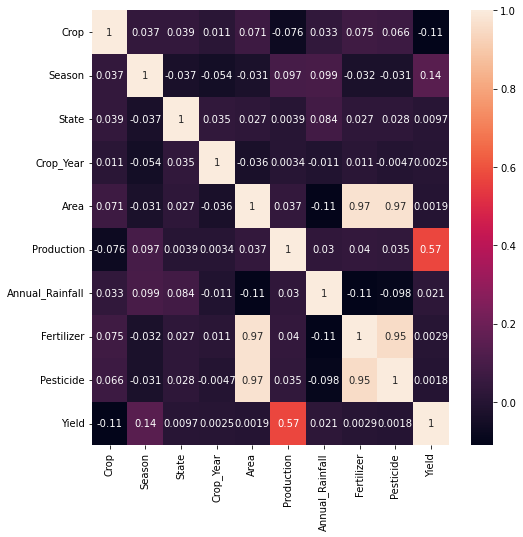

In [26]:
plt.figure(figsize=(8,8))
sb.heatmap(df_new.corr(),annot=True)

In [27]:
df_new.corr()   #to check corelation

,Crop,Season,State,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,1.000000,0.037492,0.038587,0.010933,0.071105,-0.075893,0.033462,0.074676,0.066409,-0.110894
Season,0.037492,1.000000,-0.036625,-0.053790,-0.031369,0.096856,0.099357,-0.031800,-0.030598,0.141791
State,0.038587,-0.036625,1.000000,0.035491,0.026989,0.003917,0.083953,0.026947,0.027629,0.009668
Crop_Year,0.010933,-0.053790,0.035491,1.000000,-0.035686,0.003366,-0.011187,0.011169,-0.004657,0.002539
Area,0.071105,-0.031369,0.026989,-0.035686,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858
Production,-0.075893,0.096856,0.003917,0.003366,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809
Annual_Rainfall,0.033462,0.099357,0.083953,-0.011187,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761
Fertilizer,0.074676,-0.031800,0.026947,0.011169,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862
Pesticide,0.066409,-0.030598,0.027629,-0.004657,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782
Yield,-0.110894,0.141791,0.009668,0.002539,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000


In [28]:
X=df_new.drop('Yield',axis=1)   #Split Training data
Y=df_new['Yield']    #Testing data

In [29]:
X.dtypes

Crop                 int32
Season               int32
State                int32
Crop_Year            int64
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
dtype: object

In [30]:
#Apply train_test_split for spliting the data 70% for train the model and 30% to test the model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [31]:
X_train.shape,Y_train.shape   #to check number of rows and columns in training data

((13782, 9), (13782,))

In [32]:
X_test.shape,Y_test.shape   #to check number of rows and columns in testing data

((5907, 9), (5907,))

In [33]:
#Apply Standard Scaler for scaling the data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()   #creating object of StandardScaler class
X_train=ss.fit_transform(X_train)   #apply scaling on traing data
X_test=ss.transform(X_test) #apply scaling on testing data
#it will convert into numpy 2D array

In [34]:
X_train

array([[-0.15033054, -0.84404809, -0.04398738, ..., -0.49079252,
        -0.16767815, -0.17804068],
       [ 1.45531088,  0.7999133 ,  1.51474112, ..., -0.18222621,
        -0.2730399 , -0.268115  ],
       [ 0.684603  , -1.66602879,  1.62607887, ...,  0.15529468,
         0.08809579,  0.09439194],
       ...,
       [-0.34300751, -0.84404809, -1.38004037, ...,  0.80048979,
        -0.21514443, -0.19986897],
       [ 0.49192603, -0.0220674 , -0.60067613, ..., -0.39920394,
        -0.26642689, -0.2617644 ],
       [ 1.00573128, -0.84404809, -0.26666288, ..., -0.21445183,
        -0.19777148, -0.1601967 ]])

In [35]:
X_test

array([[ 1.39108522,  1.621894  , -0.71201388, ..., -1.27704903,
        -0.27289502, -0.26790493],
       [ 1.51953653, -0.0220674 , -1.04602712, ..., -1.18134138,
        -0.24646249, -0.24578124],
       [ 1.13418259, -0.0220674 , -0.26666288, ..., -0.50024214,
         0.0849933 ,  0.09724013],
       ...,
       [ 1.06995694,  1.621894  ,  0.51270137, ...,  0.1196769 ,
        -0.27092882, -0.26537044],
       [ 0.87727997, -0.84404809, -1.26870262, ...,  0.10126226,
        -0.27007308, -0.26499029],
       [-0.7925871 , -0.84404809, -1.60271587, ..., -0.79475517,
         1.75842945,  1.65467214]])

In [36]:
#in this dataset output column is Yield and it is of continuous numberic data

#use LinearRegression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()   #create the object of LinearRegression class
lr.fit(X_train,Y_train)   #train the model with 70% data
lr.coef_    #to check the slope/coeficient of each input

array([-5.72558549e+01,  7.38243952e+01,  1.88119897e+01, -4.33978610e+00,
       -1.66180066e+01,  4.37054486e+02, -4.94821532e+00,  5.99637447e+00,
       -3.88509677e-01])

In [37]:
X.columns    #to check the input column or feature

Index(['Crop', 'Season', 'State', 'Crop_Year', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide'],
      dtype='object')

In [38]:
#create the dataframe of input feature along with their slope using dictionary.
dict={'Input Column':X.columns,'Slope':lr.coef_}
df_slope=pd.DataFrame(dict)
df_slope.sort_values(by='Slope', ascending=False,ignore_index=True)

,Input Column,Slope
0,Production,437.054486
1,Season,73.824395
2,State,18.811990
3,Fertilizer,5.996374
4,Pesticide,-0.388510
5,Crop_Year,-4.339786
6,Annual_Rainfall,-4.948215
7,Area,-16.618007
8,Crop,-57.255855


In [39]:
lr.intercept_ #to check in intercept of X and Y

69.23270498191629

In [40]:
Y_pred=lr.predict(X_test)    #test the data with 30%
#Y_pred=m1X1_test+m2X2_test+.....+m9X9_test+C

In [41]:
Y_pred

array([ 87.40418644, -52.2548715 , -27.8390588 , ..., 120.70068184,
       -94.56084272, -20.80198122])

In [42]:
#create the dataframe of Y_actual and Y_pred with the help of dictionary
dict={'Actual Output':Y_test, 'Predicted Output':Y_test}
df_output=pd.DataFrame(dict)
df_output.sort_values(by='Predicted Output', ascending=False,ignore_index=True)

,Actual Output,Predicted Output
0,21105.00000,21105.00000
1,15636.63231,15636.63231
2,14794.63000,14794.63000
3,14410.51667,14410.51667
4,13712.57308,13712.57308
...,...,...
5902,0.00000,0.00000
5903,0.00000,0.00000
5904,0.00000,0.00000
5905,0.00000,0.00000


In [43]:
#To calculate mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error: ",mse.round(2))

Mean Squared Error:  634948.56


In [44]:
#calculate training accuracy score
score1=lr.score(X_train,Y_train)
print('Training Score : ', score1.round(2))

Training Score :  0.31


In [45]:
#calculate testing accuracy score
score2=lr.score(X_test,Y_test)
print('Testing Score : ', score2.round(2))

Testing Score :  0.38


In [46]:
#here training score is less than testing score
#model is underfit.
#to overcome or remove underfit problem of model , add new features(input) in given dataset
#we will use polynomial Features class

from sklearn.preprocessing import PolynomialFeatures

#create the object of Polynomial Features class and passing degree =2
#pf=PolynomialFeatures(2)  



In [47]:
#increase the degree of input X, use inbuild method fit_transform() of PolynomialFeatures class

#X_poly=pf.fit_transform(X)  

In [48]:
#X_poly

In [49]:
#X_poly.shape,X.shape

In [50]:
#train_test_split : means to split data into 70% and 30%

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3, random_state=1)

In [51]:
X_train.shape, X_test.shape

((13782, 9), (5907, 9))

In [52]:
Y_train.shape, Y_test.shape

((13782,), (5907,))

In [53]:
#Apply Standard Scaler for scaling the data

ss=StandardScaler()   #creating object of StandardScaler class
X_train=ss.fit_transform(X_train)   #apply scaling on traing data
X_test=ss.transform(X_test) #apply scaling on testing data
#it will convert into numpy 2D array

In [54]:
X_train

array([[-0.15033054, -0.84404809, -0.04398738, ..., -0.49079252,
        -0.16767815, -0.17804068],
       [ 1.45531088,  0.7999133 ,  1.51474112, ..., -0.18222621,
        -0.2730399 , -0.268115  ],
       [ 0.684603  , -1.66602879,  1.62607887, ...,  0.15529468,
         0.08809579,  0.09439194],
       ...,
       [-0.34300751, -0.84404809, -1.38004037, ...,  0.80048979,
        -0.21514443, -0.19986897],
       [ 0.49192603, -0.0220674 , -0.60067613, ..., -0.39920394,
        -0.26642689, -0.2617644 ],
       [ 1.00573128, -0.84404809, -0.26666288, ..., -0.21445183,
        -0.19777148, -0.1601967 ]])

In [55]:
X_test

array([[ 1.39108522,  1.621894  , -0.71201388, ..., -1.27704903,
        -0.27289502, -0.26790493],
       [ 1.51953653, -0.0220674 , -1.04602712, ..., -1.18134138,
        -0.24646249, -0.24578124],
       [ 1.13418259, -0.0220674 , -0.26666288, ..., -0.50024214,
         0.0849933 ,  0.09724013],
       ...,
       [ 1.06995694,  1.621894  ,  0.51270137, ...,  0.1196769 ,
        -0.27092882, -0.26537044],
       [ 0.87727997, -0.84404809, -1.26870262, ...,  0.10126226,
        -0.27007308, -0.26499029],
       [-0.7925871 , -0.84404809, -1.60271587, ..., -0.79475517,
         1.75842945,  1.65467214]])

In [56]:
#perform the model with LinearRegression .
lr=LinearRegression()


In [57]:
lr.fit(X_train,Y_train)  #train the model with 70% data

LinearRegression()

In [58]:
lr.coef_   #to check slope

array([-5.72558549e+01,  7.38243952e+01,  1.88119897e+01, -4.33978610e+00,
       -1.66180066e+01,  4.37054486e+02, -4.94821532e+00,  5.99637447e+00,
       -3.88509677e-01])

In [59]:
lr.intercept_    #to check intercept

69.23270498191629

In [60]:
Y_pred=lr.predict(X_test)  #to test the model by 30% data

In [61]:
dict={'Actual output':Y_test, 'Predicted output' : Y_pred}
df1=pd.DataFrame(dict)
df1

,Actual output,Predicted output
7174,0.000000,87.404186
9738,4.360000,-52.254872
4646,0.460500,-27.839059
15134,1.404286,111.848849
6682,1.154211,71.439038
...,...,...
18901,1.015000,18.840409
11929,0.757368,1.031627
8249,55.631667,120.700682
16065,0.854583,-94.560843


In [62]:
#to check mean sauared error

mse=mean_squared_error(Y_test,Y_pred)
print("Mean squared error : ",mse.round(2))

Mean squared error :  634948.56


In [63]:
#Evaluation the model
score1=lr.score(X_train,Y_train)
score1=np.round(score1,2)
print("Training Score : ",score1) 

Training Score :  0.31


In [64]:
#Evaluation the model
score2=lr.score(X_test,Y_test)
score2=np.round(score2,2)
print("Testing Score : ",score2)

Testing Score :  0.38


In [65]:
#Find r2 score 
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.37597200076303305

In [66]:
#here model is perfect because training score > testing score and the difference between both score is 5


In [67]:
#Deployment Of Model 
#save model
import pickle


In [68]:
#To open file in write binary for model create
file1=open("model.pkl","wb")  #model.pkl: new file which sotre object of algorithm which got highest score

#To open file in write binary for scaling
file2=open("scale.pkl","wb")  #scale.pkl : new file which store the object of StandardScaler class 

#To open file in write binary for LabelEncoder
file3 = open("label.pkl","wb")  #label.pkl : new file which store the object of LabelEncoder class

#file1, file2 and file3 are tempoary file


In [69]:
#save object of Algorithm (LinearRegression) class in temp file file1
#use inbuilt method dump() which method define in pickle class
pickle.dump(lr,file1) #syntax - pickle.dump(object of algorithm,temp file)
#to close temp file file1
file1.close()



In [70]:
#save object of StandardSclaer class
pickle.dump(ss,file2)
#to close temp file file2
file2.close()

In [71]:
#save object of LabelEncoding class
pickle.dump(le,file3)
#to close temp file file3
file3.close()

#file4=open("Poly.pkl","wb")
#pickle.dump(pf,file4)
#file4.close()